# Project: TMDb Data Analysis (WGU)
### Patrick Cook  01/26/21
<br>
<br>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>

## Introduction

> In this project, movie data will be analyzed from the TMDb (The Movie Database) dataset as supplied from Udacity resources in the Introduction to Data Analysis course. This project looks at characteristics of the top revenue generating movies, greater than 60 minutes in length, for each year from 1960 to 2015. In addition, movies that are classified as TV Movies and those movies with revenues below \\$2000 will be excluded. The focus will be on the actors, genre and revenue of the top movies per year to determine if there are any possible trends or changes in trends over time associated with the data that may be studied in more detail in the future.
>
> Questions the report intends to answer are:
> 1. What are the top movies each year based on their 2010 adjusted revenue generated?
> 2. What are the genres of the top movies each year based on 2010 adjusted revenue generated?
> 3. Who are the actors in the top movies each year based on the 2010 adjusted revenue generated?
>
>The importance of answering the above questions is to determine if any observable patterns exist that may lead to decisions that might affect the success (through revenue) of a movie.
>
>Note that, to answer the above questions, the data will be examined including the use of central tendency measures and correlation of variables. The following discussion and answers to the questions above pertains only to data provided in this dataset and is limited by the quality of the data and data collection methods. Observations will be made but no correlation or causation can be determined based on this data set without further research and updating the dataset. Therefore no inferences are to be implied but hopefully the analysis will lead to deeper question to pursue.

In [1]:

# Package Imports used in the project including magic commands

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section the data will be examined to understand what is available and what inconsistencies exist in the data.  Researching the dataset's origin is will also be done during this phase. After an examination and research, the data will be cleaned using methods such as finding and replacing missing data values, correcting existing data issues, reforming data, removing data and ignoring but not removing data.

### General Properties of the TMDb Dataset
> The TMDb dataset was originally gathered from kaggle.com and has been preliminary cleaned though it still needs more cleaning done. The dataset contains 21 columns and 10866 records. The dataset contains release dates and years, budgets and revenues, genres, cast, websites, directors, production companies, votes and ratings, popularity score, taglines and overviews among other information on movies, tv shows, and shorts. 

In [2]:
# loading the dataset into a dataframe using pandas csv reader
# and displaying the first three records to determine data
# points available including text formats, differences in 
# values, number scale and precision.

df = pd.read_csv('tmdb_movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### Observations of the above:
>Examing the 3 records above and researching on kaggle.com, I note: 
> 1. The id and imdb_id might be primary key candidates if needed. 
> 2. The popularity score is likely a calculated value due to the six decimals given and could be reduced to one or two decimal places without any significant affects. 
> 3. The budget looks like an estimate but the revenue does not. There is an adjusted budget and revenue that are derived from these two columns. The large values are in scientific notation and will need to be reformatted or scaled to be clear to the observer.
> 4. The runtime seems to be given in minutes, the release day in mm/dd/yy format and the release year as YYYY.
> 5. The websites listed are non-secure indicating the data was likely collected prior to 2018. If activated to live addresses in the report, they would need to be converted to https.
> 6. The vote average is likely based on an upper limit of 10 and seem to have a significant amount of participants shown in the vote count, possibly leading to a valid "trust worthy" rating.
> 7. The cast, genres and production_companies data are pipe, " | ", separated string lists and will need a common helper function to separate.
>
>The column data will be examined next to determine shape, missing or inconsistent values and data type issues.


In [3]:
#Examing column names, data types, non-null values and shape of the dataframe
# to determine shape, missing or inconsistent values and data type issues.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Observations of the above:
>Examining the column information above and researching on kaggle.com, themoviedb.org, imdb.com and the-numbers.com I note: 
> 1. The **release date should be converted to datetime type** to prevent any coercion errors and allow for time based operations if needed. The release year is an int and will not cause any issues for the scope of the project.
> 2. The numerical data is all set to 64 bits and could be downcasted to 8, 16 or 32 bits to save memory. For this dataset, the memory usage is not too significant and therefore downcasting won't be done.  
> 3. There are several columns with missing data: imdb_id, **cast**, homepage, director, tagline, keywords, overview, **genres** and production_companies. Cast and genres are indepedent variables for this project. They are important for answering the questions and will need to be handled. The values missing are low and will be looked up and replaced using themoviedb.com, imdb.com and other sources.   
>
>Next, I will look at the central tendency measures of the raw uncleaned data to identify problems in the data.

In [4]:
# Examining max, min, mean and std dev of the date to check for issues and if the data makes sense.
# formating to 4 decimals to remove scientific notation and make values more readable

# format output
format_dict = {
    'id': "{:.0f}", 'runtime': "{:.0f}", 'vote_count': "{:.0f}", 'release_year': "{:.0f}",
    'budget' : "${:,.2f}", 'revenue' : "${:,.2f}", 'vote_average' : "{:.2f}",
    'budget_adj' : "${:,.2f}", 'revenue_adj' : "${:,.2f}"
}

df.describe().style.format(format_dict)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866,10866,"$10,866.00","$10,866.00",10866,10866,10866.00,10866,"$10,866.00","$10,866.00"
mean,66064,0.646441,"$14,625,701.09","$39,823,319.79",102,217,5.97,2001,"$17,551,039.82","$51,364,363.25"
std,92130,1.00018,"$30,913,213.83","$117,003,486.58",31,576,0.94,13,"$34,306,155.72","$144,632,485.04"
min,5,6.5e-05,$0.00,$0.00,0,10,1.50,1960,$0.00,$0.00
25%,10596,0.207583,$0.00,$0.00,90,17,5.40,1995,$0.00,$0.00
50%,20669,0.383856,$0.00,$0.00,99,38,6.00,2006,$0.00,$0.00
75%,75610,0.713817,"$15,000,000.00","$24,000,000.00",111,146,6.60,2011,"$20,853,251.08","$33,697,095.72"
max,417859,32.9858,"$425,000,000.00","$2,781,505,847.00",900,9767,9.20,2015,"$425,000,000.00","$2,827,123,750.41"


### Observations of the above:
>Examining the descriptive statistics of measures of central tendency above and researching the dataset origins: 
> 1. The popularity has an extreme maximum of 32.99. According to themoviedb.com, the popularity is based on user number of views for the day, total votes, and previous day's score among other parameters. The movie that received the highest popularity score was Jurassic World which had unique website that went viral and received many views per day. Therefore, this score seems reasonable.
> 2. The remaining maximums were checked using the method below and after researching found to be reasonable values.
> 3. The minimum of zero for budget, revenue, runtime, adjusted budget and adjusted revenues are due to zero values.
> 4. The budget and revenue columns also have a large standard deviation from the mean requiring further examination of these columns.
>
> I will next examine the columns for the number of zeros and NAs in each column to determine how to best clean the data.
>

In [5]:
# Examining Maximum Data point records

df.iloc[df['popularity'].idxmax()]


id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action

### Examining scatterplots of the data to get an idea of how data is distributed.

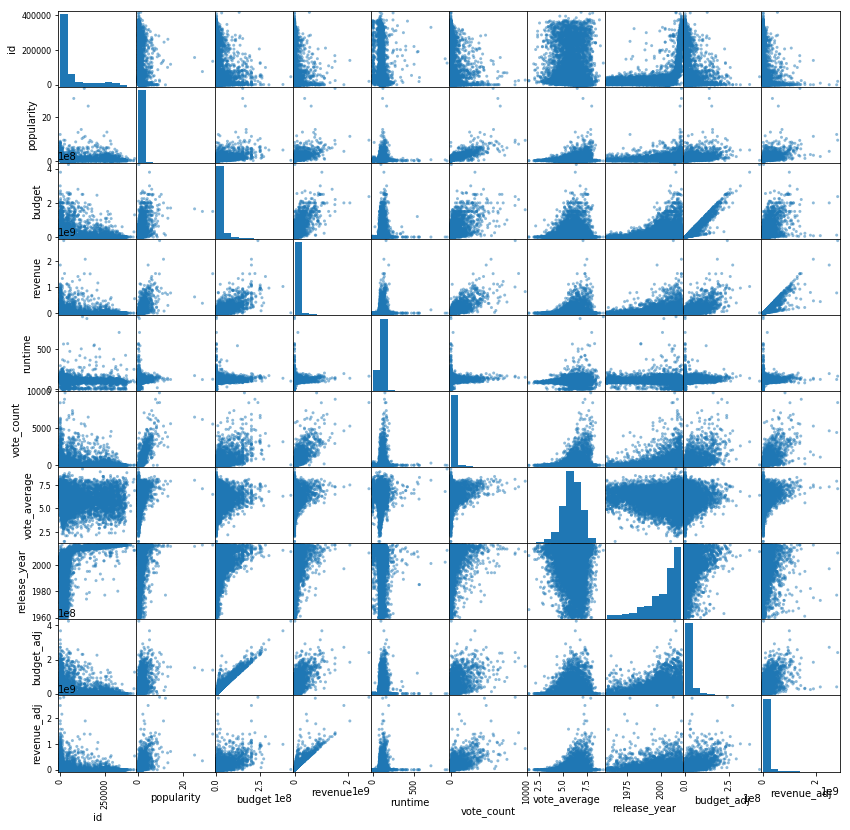

In [6]:
pd.plotting.scatter_matrix(df, figsize = (14,14))
plt.show()

### Observations of the above:
> The majority of the histograms show right skewness and likely have significant zeros in the data. Looking at the histograms above, the release year data is left skewed. This is expected due to the TMDb website starting in 2008. The majority of the contributors would likely be biased towards movies they know around that time and after. The vote average histogram also shows data that is normally distributed as expected due to the high number of individuals voting.
>
> The remaining histograms are right skewed and in the case of the budgets and revenues, likely have significant zero values. Next, I will check the columns for zeros, NAs (Nulls) and duplicates.

In [7]:
# number of zeros in each column

df[df == 0].count(axis=0)

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

### Observations of the above:
> There are significant zeros values for both non-adjusted and adjusted budgets and revenue. In addition, there are a 31 zeros for the runtime. The budget and runtime columns should not be zero. The revenue could be zero though not in the counts shown above. These will need to be researched and addressed.

In [8]:
# number of nulls in each column

(df.isna()).sum(axis=0)

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Observations of the above:
> There are significant missing values in the dataset. Most are in columns that are not relevant to the questions being answered. The columns that will need to be addressed are cast and genres as these are independent variables to the questions posed. Those columns have minor missing values and will need to be researched and addressed. The director and production_companies attributes might be useful for further study but not for the particular questions posed.

In [9]:
# Check for duplicates and verify they are duplicates

duplicate_count = df[df.duplicated(keep=False)]
print(len(duplicate_count))

duplicate_count

2


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Observations of the above:
> One duplicate was found and will be dropped. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning
> To clean the data, I started by making a copy of the original dataset and saving it as a backup. Next, missing values for cast, genres and runtime entered directly into a copy of the dataset. The values are based on data found on themoviedb.org, imdb.com and the-numbers.com. Clean data for these columns is important due to them being my independent variables. Then, I read the data into a new data frame called clean_df and performed the following on that dataframe.
> 1. The duplicate row was removed.
> 2. The columns id, imdb_id, popularity, budget, revenue, homepage, tagline, keywords, overview, production_companies, vote_count, vote_average, and budget_adj were removed. The dependent variables are revenue_adj and year. Release_date contains time data that may be useful in comparing monthly and will be kept for future analysis. The objective of the analysis is to study patterns and trends of the top revenue generating movies per year and therefor the independent variables will be cast, genre and runtime. Directors may have an influence on revenue so that column was also kept for future analysis.
> 3. Entries that have runtimes less than 60 minutes or contained TV Movie as a genre were removed. The analysis is based on movies that generated the most revenue and these categories either did not have associated revenues due to inability to quantify (short films, made for tv) or were insignificant in revenue compared to the top revenues.
> 4. Values of zero in the revenue_adj column were replaced with nulls so that they would not affect revenue calculations such as mean and std deviation. In addition, values \\$2000 and below will also be changed. These were errors in the dataset for which no other sources could confirm. The row data will not be completely removed due to their value in examining related data such as movie genre, cast and runtime data.
> 5. Release date will only be used to verify joins and therfore the datatype will not be changed. 
> 6. To analyze the categorical data in the genres and cast columns, a copy of the dataframe, named split_clean_df, will be created. The data will be split using the split_at_pipe function listed at the end of this section. The function will split a text string at the pipe, "|", creating duplicate row information for each piece of text split.
>
>Below are the datacleaning steps taken. 

In [11]:
#Read in dataset with missing data added

clean_df = pd.read_csv('tmdb_movies2.csv')
clean_df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,77959,tt2055789,0.027928,0,0,Turbo Charged Prelude to 2 Fast 2 Furious,Paul Walker|Minka Kelly|Rodney Neil|Peter Aylw...,NaN,Philip G. Atwell,NaN,...,"Turbo-Charged Prelude is a 2003 short film, di...",6,Action,Original Film,6/1/2003,32,6.8,2003,0.0,0.0


In [12]:
# Drop duplicate row.
# Columns are equivalent with no first/last preference

clean_df.drop_duplicates(inplace=True)
len(clean_df[clean_df.duplicated(keep=False)])

0

In [13]:
# Drop non-relavent columns:

drop_col_list = ['id', 'imdb_id', 'popularity', 'budget', 'revenue',\
                 'homepage', 'tagline', 'keywords', 'overview', 'production_companies',\
                 'vote_count', 'vote_average', 'budget_adj']

clean_df.drop(columns=drop_col_list, inplace=True)


In [14]:
#check columns and row were dropped

clean_df.shape


(10865, 8)

In [15]:
#  Remove columns where genres columns contains TV Movie.

clean_df.drop(clean_df[clean_df.genres.str.contains("TV Movie")].index, inplace=True)


In [16]:
# Remove rows where runtimes are 60 minutes or less and reset index to zero.

clean_df.drop(clean_df[clean_df['runtime'] < 61].index, inplace=True)
clean_df.reset_index(drop=True, inplace=True)


In [17]:
#  Replace Values of zero in the revenue_adj column with nulls.

clean_df['revenue_adj'].mask(clean_df['revenue_adj']<2000, inplace=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10397 entries, 0 to 10396
Data columns (total 8 columns):
original_title    10397 non-null object
cast              10357 non-null object
director          10372 non-null object
runtime           10397 non-null int64
genres            10397 non-null object
release_date      10397 non-null object
release_year      10397 non-null int64
revenue_adj       4801 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 649.9+ KB


In [18]:
# Count Test to ensure no data was removed: Check NaN values were successful

nan_test = len(clean_df[clean_df['revenue_adj'].isnull()]) + len(clean_df[clean_df['revenue_adj'].notnull()]) == len(clean_df)
print('Does nan counts plus values count equal column count: ' + str(nan_test))
clean_df.head(2)


Does nan counts plus values count equal column count: True


,original_title,cast,director,runtime,genres,release_date,release_year,revenue_adj
0,American Muscle,Nick Principe|Todd Farmer|Malice McMunn|Trent ...,Ravi Dhar,77,Action,9/30/2014,2014,NaN
1,The Marine 3: Homefront,Mike Mizanin|Neal McDonough|Michael Eklund|Ash...,Scott Wiper,86,Action,3/5/2013,2013,NaN


In [19]:
# Check dataframe metadata to confirm above steps were successful

clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10397 entries, 0 to 10396
Data columns (total 8 columns):
original_title    10397 non-null object
cast              10357 non-null object
director          10372 non-null object
runtime           10397 non-null int64
genres            10397 non-null object
release_date      10397 non-null object
release_year      10397 non-null int64
revenue_adj       4801 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 649.9+ KB


In [20]:
# Check NaN values were successful

clean_df.head()


,original_title,cast,director,runtime,genres,release_date,release_year,revenue_adj
0,American Muscle,Nick Principe|Todd Farmer|Malice McMunn|Trent ...,Ravi Dhar,77,Action,9/30/2014,2014,NaN
1,The Marine 3: Homefront,Mike Mizanin|Neal McDonough|Michael Eklund|Ash...,Scott Wiper,86,Action,3/5/2013,2013,NaN
2,Freerunner,Sean Faris|Danny Dyer|Tamer Hassan|Amanda Full...,Lawrence Silverstein,87,Action,9/14/2011,2011,NaN
3,Autobahnraser,Luke Wilkins|Alexandra Neldel|Niels-Bruno Schm...,Michael Keusch,87,Action,2/19/2004,2004,NaN
4,Riot,Matthew Reese|Dolph Lundgren|Danielle Chuchran...,John Lyde,88,Action,9/27/2015,2015,NaN


### Organize and protect the data and create dataframes to be used

In [21]:
# Copy of clean_df to hold seperated categorical data
# from cast and genres

split_clean_df = clean_df.copy()


In [22]:
# Function to split data at pipe '|' and join to split_clean_df.
# Takes in a column to split as string and returns a joined dataframe.

def split_at_pipe(col_name):
    dt = clean_df[['original_title','cast','director','runtime','genres','release_date', 'release_year', 'revenue_adj']]

    temp = dt[col_name].str.split('|').apply(pd.Series, 1).stack()
    temp.index = temp.index.droplevel(-1)
    temp.name = col_name
    del dt[col_name]
    return dt.join(temp)


In [23]:

# genre_clean_df holds seperated genre data in genre column

genre_clean_df = split_at_pipe('genres')
genre_clean_df.tail(3)

,original_title,cast,director,runtime,release_date,release_year,revenue_adj,genres
10396,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,12/10/2009,2009,2.827124e+09,Adventure
10396,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,12/10/2009,2009,2.827124e+09,Fantasy
10396,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,12/10/2009,2009,2.827124e+09,Science Fiction


In [24]:

# cast_clean_df holds seperated genre data in genre column

cast_clean_df = split_at_pipe('cast')
cast_clean_df.tail(3)

,original_title,director,runtime,genres,release_date,release_year,revenue_adj,cast
10396,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/2009,2009,2.827124e+09,Sigourney Weaver
10396,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/2009,2009,2.827124e+09,Stephen Lang
10396,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/2009,2009,2.827124e+09,Michelle Rodriguez


<a id='eda'></a>
## Exploratory Data Analysis


### Descriptive Statistics:  What does the cleaned movie data look like?

In [25]:
# look at the central tendancy measurements for adjusted revenue and year.

#format output
format_dict = {
    'release_year': "{:.0f}",
    'revenue_adj' : "${:,.2f}"
}


time_revenue_df = clean_df[['release_year', 'revenue_adj', 'original_title']]
time_revenue_df.describe().style.format(format_dict)


,release_year,revenue_adj
count,10397,"$4,801.00"
mean,2001,"$116,269,603.75"
std,13,"$199,522,637.97"
min,1960,"$2,394.31"
25%,1994,"$11,178,884.90"
50%,2005,"$44,814,179.64"
75%,2011,"$133,457,615.90"
max,2015,"$2,827,123,750.00"


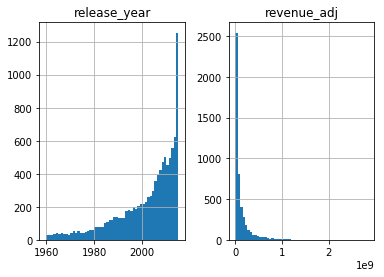

In [26]:
# Distribution of the data per year (release_year) and revenue (revenue_adj)

time_revenue_df.hist(bins = 55);


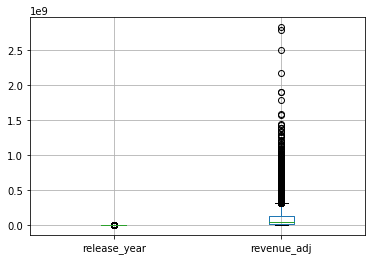

In [27]:
# Checking outliers using boxplot for revenue and year
time_revenue_df.boxplot();


### Observations of central tendancy measurements and distributions above
> The years range from 1960 to 2015 . The majority of the movie data is after 1994 and increase until 2015. The revenue still has a large standard deviation indicating most movies revenue were far from the mean value of 116 million. This can be seen in the graphs right skew. There are significant outliers as the mean is approximately 71.5 million more than the median. These outliers are clearly seen in the box plots above. This analysis is concerned with the highest revenue movies and the right skew of the revenue will not affect our answers. 
>
> The left skew of the release_year data will affect the confidence in our answers if applied to the population of yearly total movie releases. The data has few data points for movies prior to 1994 and therefore our answers will be limited to the movies given in this data set. In the later, more recent years, our data becomes more representative of the population but is still biased toward English language movies as there are likely few foreign movies in the data. The project will look at genre data in a later question below. 
>
> The highest grossing movie in the data had an adjust revenue of \\$2,827,123,750 which is more than 10 times the average revenue for in this data. Next, I will look at the movies that had the greatest revenue each year. To find out which movie had that highest revenue and what year it occurred we will answer the question, "What are the top movies each year based on their 2010 adjusted revenue generated?"


## Question 1:  What are the top movies each year based on their 2010 adjusted revenue generated?
> Below is a table giving each year's maximum revenue and the title of the movie that had that revenue.

In [28]:
# Get index of highest revenue movies

idx = time_revenue_df.groupby('release_year', sort=False)["revenue_adj"]\
    .transform(max) == time_revenue_df['revenue_adj']

# Dataframe to store max revenue movies. Use index on remaining quesions. Clean up Columns/Names

max_rev_movie = time_revenue_df[idx].sort_values('release_year')
max_rev_movie = max_rev_movie.rename(columns={\
    'release_year': 'Year', 'revenue_adj': 'Maximum_Revenue', 'original_title': 'Title'
    })

# format style for new column names

format_dict = {
    'Year': "{:.0f}",
    'Maximum_Revenue' : "${:,.2f}"
}

max_rev_movie.style.format(format_dict)

,Year,Maximum_Revenue,Title
8654,1960,"$442,378,047.40",Spartacus
9868,1961,"$1,574,814,740.00",One Hundred and One Dalmatians
8826,1962,"$504,591,421.50",Lawrence of Arabia
8956,1963,"$561,773,359.00",From Russia With Love
9418,1964,"$878,080,399.50",Goldfinger
9650,1965,"$1,129,534,862.00",The Sound of Music
8025,1966,"$226,643,572.40",Who's Afraid of Virginia Woolf?
9828,1967,"$1,345,551,059.00",The Jungle Book
8600,1968,"$355,546,597.20",2001: A Space Odyssey
9218,1969,"$608,151,066.30",Butch Cassidy and the Sundance Kid


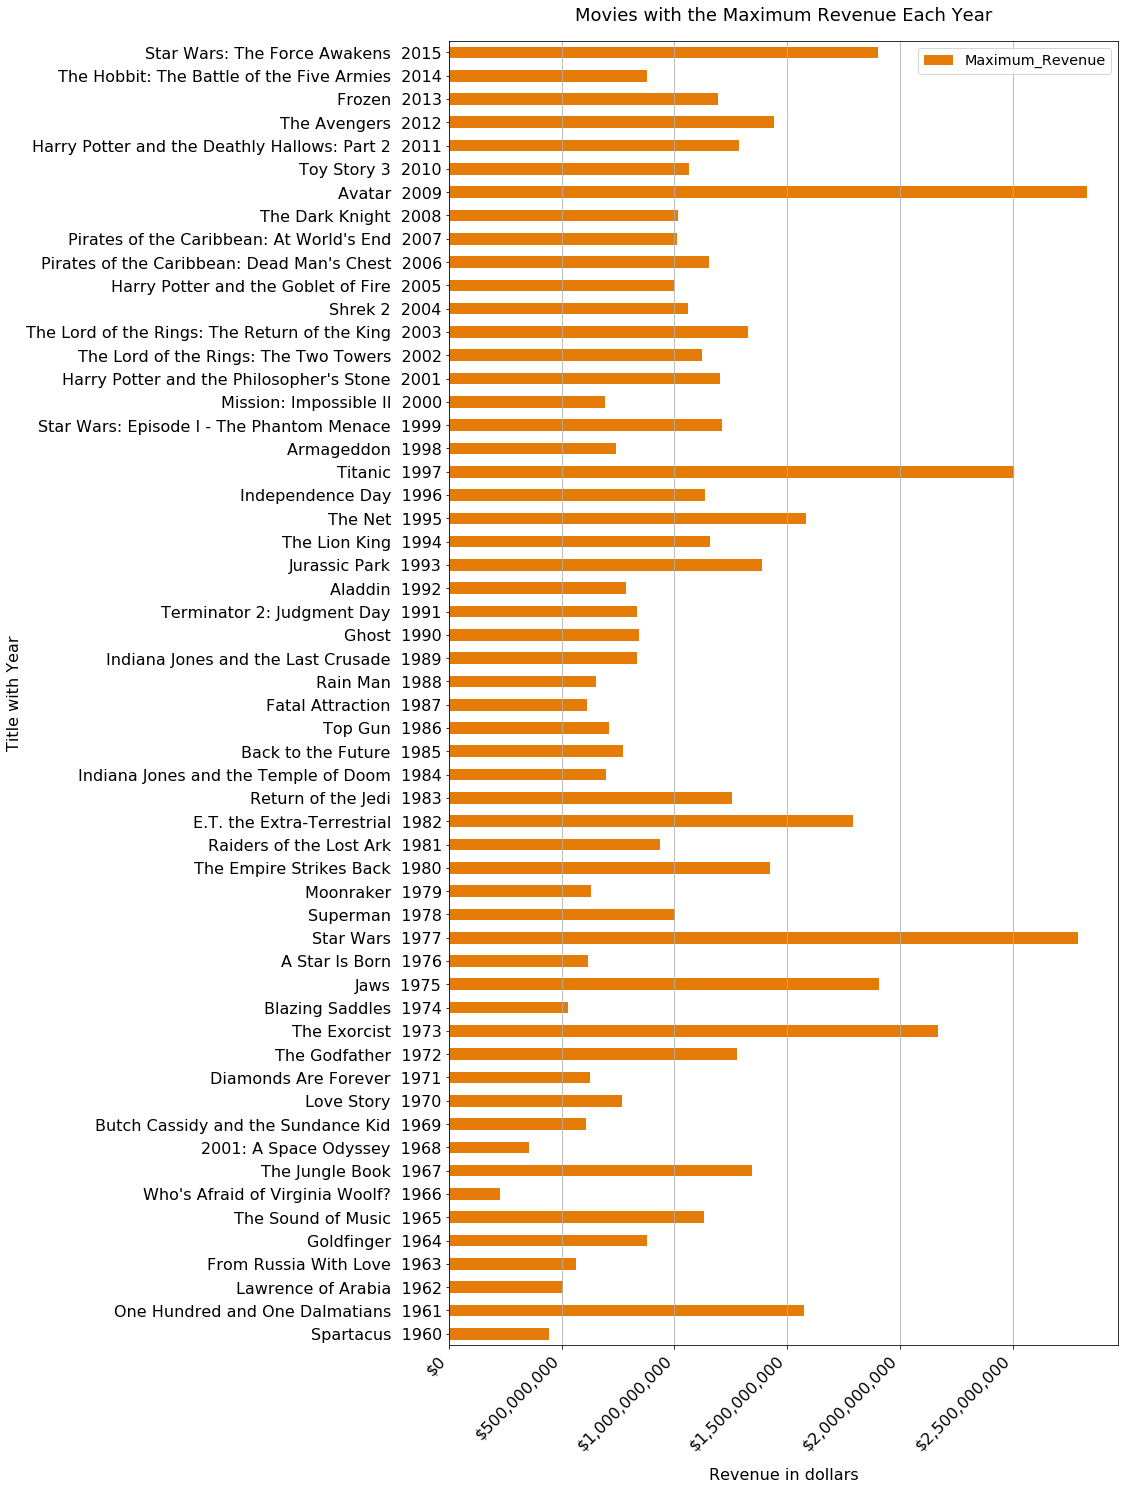

In [29]:
# Combine movie title with year for y-axis labels 

y_list = ((max_rev_movie['Title']) + ' ' + ' ' + max_rev_movie['Year'].map(str))

# Create base plot
ax = max_rev_movie.plot.barh(
    x = 'Year',
    y = 'Maximum_Revenue',
    yticks = y_list.index,
    color = '#E57C08',
    figsize = (12,24)
)

# Format plot and change y-axis labels
ax.set_yticklabels(y_list)
plt.legend(fontsize="x-large") 
plt.xticks(size=16, rotation=45, ha='right')
plt.yticks(size=16)
plt.title("Movies with the Maximum Revenue Each Year",size=18, pad=20)
plt.ylabel("Title with Year", size=16)
plt.xlabel("Revenue in dollars", size=16, labelpad=15)
plt.grid(axis='x', which='major')
ax.get_xaxis().get_major_formatter().set_scientific(False)
fmt = '${x:,.0f}'
tmark = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tmark) 



### What are the top movies each year based on their 2010 adjusted revenue generated?
> The chart and table above list the movies with the top revenue for each year given. The movie that had the absolute highest revenue according to this dataset was "Avatar" in 2009. These is no obvious patterns and the maximum revenue per year seems to fluctuate a lot with the lowest maximum being "Who's Afraid of Virginia Wolf" at just over \\$226 million and the highest maximum revenue "Avatar" with over \\$2.8 billion, more than 10 times as much. Beginning in 2001, the top revenue movies seem be hovering around \\$1 billion dollars. Looking at the titles of the movie seems to indicate a possible relationship with the genres of action, adventure and animation. We will look at those categories next.

## Question 2:  What are the genres of the top movies each year based on 2010 adjusted revenue generated?
> The next question is, What are the genres of the top movies each year based on the 2010 adjusted revenue generated? Some interesting things to find out is if there is any consistent genres that appear in the data and if the genre patterns for top revenue movies have changed over the 55 year period.
>
>To answer this question, I will join the genre_year_count dataframe with the max_rev_movie dataframes. The only data the max_rev_movie dataframe is missing is the genre data. Next I create a copy of the table to join the genre data, as a string, into its own column.  a table giving each year's maximum revenue and the genre of the movie that had that revenue.
>

In [30]:
# Inner join to get rows from genre_clean_df that match max_rev_movie
# getting the genres of the highest revenue movies. 

genre_year_count_df = max_rev_movie.join(genre_clean_df, how='inner', sort=True)

# Drop unneeded columns.

genre_year_count_df = genre_year_count_df.drop(\
        columns=['original_title', 'cast', 'director', 'runtime', 'release_date', 'release_year', 'revenue_adj']
)

In [31]:
#Create a table copy due to future changes in the shape.
genre_year_table_df = genre_year_count_df.copy()

# Sorting genre data prior to string join so genre string list will be alphabetical.
genre_year_table_df = genre_year_table_df.sort_values(by=['Year', 'genres'])
genre_year_table_df = genre_year_table_df.groupby(['Year','Maximum_Revenue','Title'])\
                                ['genres'].apply(', '.join).reset_index()


genre_year_table_df.style.format(format_dict)

,Year,Maximum_Revenue,Title,genres
0,1960,"$442,378,047.40",Spartacus,"Action, Drama, History"
1,1961,"$1,574,814,740.00",One Hundred and One Dalmatians,"Adventure, Animation, Comedy, Family"
2,1962,"$504,591,421.50",Lawrence of Arabia,"Adventure, Drama, History, War"
3,1963,"$561,773,359.00",From Russia With Love,"Action, Adventure, Thriller"
4,1964,"$878,080,399.50",Goldfinger,"Action, Adventure, Thriller"
5,1965,"$1,129,534,862.00",The Sound of Music,"Drama, Family, Music, Romance"
6,1966,"$226,643,572.40",Who's Afraid of Virginia Woolf?,Drama
7,1967,"$1,345,551,059.00",The Jungle Book,"Adventure, Animation, Family"
8,1968,"$355,546,597.20",2001: A Space Odyssey,"Adventure, Mystery, Science Fiction"
9,1969,"$608,151,066.30",Butch Cassidy and the Sundance Kid,"Crime, Drama, History, Western"


### Observations of the Genres of the Movies with Max Revenue Values per Year Table:
> Looking at the genres, I notice that many are Action and Adventure and more recently Fantasy started to increase. These are just observations and the table is not the best place to see categorical data so next I will create a categorical plots of the data (below).
>



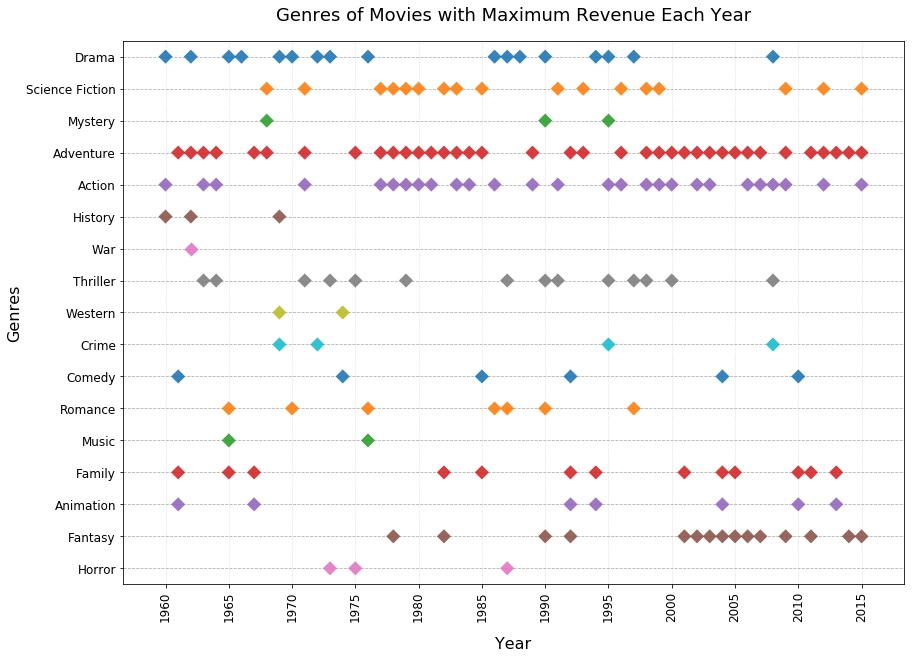

In [32]:
# Create categorical plot (stripplot) to view patterns in genres data

# Create x axis values list from 1960 to 1965 by fives

x_year_val = (range(1960,2016,5))

fig, ax = plt.subplots(figsize=(14,10))

sns.stripplot(
    x="Year", y="genres", jitter=False, data=genre_year_count_df,
    size=10, marker="D", edgecolor="black", alpha=0.9,
    palette=sns.color_palette('tab10', n_colors=17)
)

# format plot

plt.xticks(x_year_val, size=12, rotation=90, ha='center')
plt.yticks(size=12)
plt.title("Genres of Movies with Maximum Revenue Each Year",size=18, pad=20)
plt.ylabel("Genres", size=16)
plt.xlabel("Year", size=16, labelpad=15)
plt.grid(axis='x', which='major', alpha=0.5, ls=':')
plt.grid(axis='y', which='major', ls='--')


### Observations of the Genres of the Movies with Max Revenue Each Year figure above:
> Looking at the categorical plot above, there is a pattern with genres for the top revenue movies per year. The majority of movies' genre were adventure for almost the entire timeline. There are small gaps between 1965 to 1975 and 1985 to 1995 where adventure was replaced with the drama and thriller genres for the top movies. The next category is Action which is for the majority of years a subcategory of the same adventure movie. An interesting observation is the fantasy category that seems to have become more popular starting in 2001. Looking at the table above and comparing those years, it is found that those are mostly due to the Harry Potter and Lord of the Rings series of movies. 
>
>Next, we will do a similar comparison of actors to find out if there are similar patterns and trends with actors. Knowing that the Harry Potter and Lord of the Rings, among others, are showing trends, I expect the actors for at least those movies will also show similar trends.
>

## Question 3:  Who are the actors in the top movies each year based on the 2010 adjusted revenue generated?
> To answer the question, "Who are the actors in the top movies each year based on the 2010 adjusted revenue generated?", we will follow the same steps as above to attempt to find the patterns. After merging the data of the max_rev_movie dataframe with the cast_clean dataframe, we will make one copy for the table data and one for the graphical data. Then we will explore both looking for similar trends as in the genre analysis.
>

In [33]:
# Inner join to get rows from cast_clean_df that match max_rev_movie
# getting the cast of the highest revenue movies. 

cast_year_count_df = max_rev_movie.join(cast_clean_df, how='inner', sort=True)

# Drop unneeded columns.

cast_year_count_df = cast_year_count_df.drop(\
        columns=['original_title', 'director', 'runtime', 'genres', 'release_date', 'release_year', 'revenue_adj']
)

# Correct name of Gert Frobe which contains bad asci characters due to character accents
row_with_Err1 = cast_year_count_df[(cast_year_count_df['Year'] == 1964) & (cast_year_count_df['cast'] == 'Gert FrÃ¶be')]
cast_year_count_df.at[9418, 'cast'][2] = 'Gert Frobe'

# Correct name of Corinne Clery which contains bad asci characters due to character accents
row_with_Err2 = cast_year_count_df[(cast_year_count_df['Year'] == 1979) & (cast_year_count_df['cast'] == 'Corinne ClÃ©ry')]
cast_year_count_df.at[9840, 'cast'][3] = 'Corinne Clery'


In [34]:
#Create a table copy due to future changes in the shape.
cast_year_table_df = cast_year_count_df.copy()

# Sorting genre data prior to string join so genre string list will be alphabetical.
cast_year_table_df = cast_year_table_df.sort_values(by=['Year', 'cast'])
cast_year_table_df = cast_year_table_df.groupby(['Year','Maximum_Revenue','Title'])\
                                ['cast'].apply(', '.join).reset_index()

# Formating 
cast_year_table_df.style.format(format_dict)


,Year,Maximum_Revenue,Title,cast
0,1960,"$442,378,047.40",Spartacus,"Charles Laughton, Jean Simmons, Kirk Douglas, Laurence Olivier, Peter Ustinov"
1,1961,"$1,574,814,740.00",One Hundred and One Dalmatians,"Ben Wright, Betty Lou Gerson, J. Pat O'Malley, Martha Wentworth, Rod Taylor"
2,1962,"$504,591,421.50",Lawrence of Arabia,"Alec Guinness, Anthony Quinn, Jack Hawkins, Omar Sharif, Peter O'Toole"
3,1963,"$561,773,359.00",From Russia With Love,"Bernard Lee, Daniela Bianchi, Lotte Lenya, Robert Shaw, Sean Connery"
4,1964,"$878,080,399.50",Goldfinger,"Gert Frobe, Honor Blackman, Sean Connery, Shirley Eaton, Tania Mallet"
5,1965,"$1,129,534,862.00",The Sound of Music,"Christopher Plummer, Eleanor Parker, Julie Andrews, Peggy Wood, Richard Haydn"
6,1966,"$226,643,572.40",Who's Afraid of Virginia Woolf?,"Agnes Flanagan, Elizabeth Taylor, George Segal, Richard Burton, Sandy Dennis"
7,1967,"$1,345,551,059.00",The Jungle Book,"George Sanders, Louis Prima, Phil Harris, Sebastian Cabot, Sterling Holloway"
8,1968,"$355,546,597.20",2001: A Space Odyssey,"Daniel Richter, Douglas Rain, Gary Lockwood, Keir Dullea, William Sylvester"
9,1969,"$608,151,066.30",Butch Cassidy and the Sundance Kid,"Henry Jones, Katharine Ross, Paul Newman, Robert Redford, Strother Martin"


### Observations of the Cast of the Movies with Max Revenue Values per Year Table:
> Looking at the cast, I notice there will be a lot of categories due to cast members that have only appeared in one movie. The question, "Who are the actors in the top movies each year based on the 2010 adjusted revenue generated?", being asked has been answered with the above table. The stripplot graphic is to show trends or patterns that could be influencing whether or not a movie made the top revenue for that year. The stripplot would be able to handle so many categories by getting longer but removing them will not affect the results and will lead to a cleaner, more informative and easier to read graphic. Therefore, cast members who appeared in less than two movies will not be included. From the below calculations, there are 236 unique actors and 280 records showing that some actors have appeared in multiple movies. Removing the one that have not will reduce the category count to a more reasonable number. Even if the categories are a few dozen after the removal, the category count is still manageable using the stripplot.
>

In [35]:
# Check number of unique categories

unique_cast_members = cast_year_count_df['cast'].nunique()
total_cast_members = cast_year_count_df['cast'].count()

print('There are: ' + str(unique_cast_members) + ' out of ' + str(total_cast_members) + ' total records.')


There are: 236 out of 280 total records.


In [36]:
# Create dataframe to reduce cast members to only those
# appearing in more than one movie

nonunique_cast_df = cast_year_count_df.copy()

# Get list of those actosrs appearing in more than one movie
# to filter nonunique_cast_df stripplot

grp_by_cnt = nonunique_cast_df.groupby('cast').count()

multi_movies_cast = grp_by_cnt[grp_by_cnt.Title >1].index
print('The will be ' + str(len(multi_movies_cast)) + ' cast categories.' )

The will be 25 cast categories.


In [37]:
# Keep only cast members that appear in more than one movie.
# Replace others with nan to keep year data but exclude cast

nonunique_cast_df['cast'].where(nonunique_cast_df['cast'].isin(multi_movies_cast), np.nan, inplace=True)

# Verify replacements
nonunique_cast_df.loc[10395]


,Year,Maximum_Revenue,Title,cast
10395,2015,1.902723e+09,Star Wars: The Force Awakens,Harrison Ford
10395,2015,1.902723e+09,Star Wars: The Force Awakens,Mark Hamill
10395,2015,1.902723e+09,Star Wars: The Force Awakens,Carrie Fisher
10395,2015,1.902723e+09,Star Wars: The Force Awakens,NaN
10395,2015,1.902723e+09,Star Wars: The Force Awakens,NaN


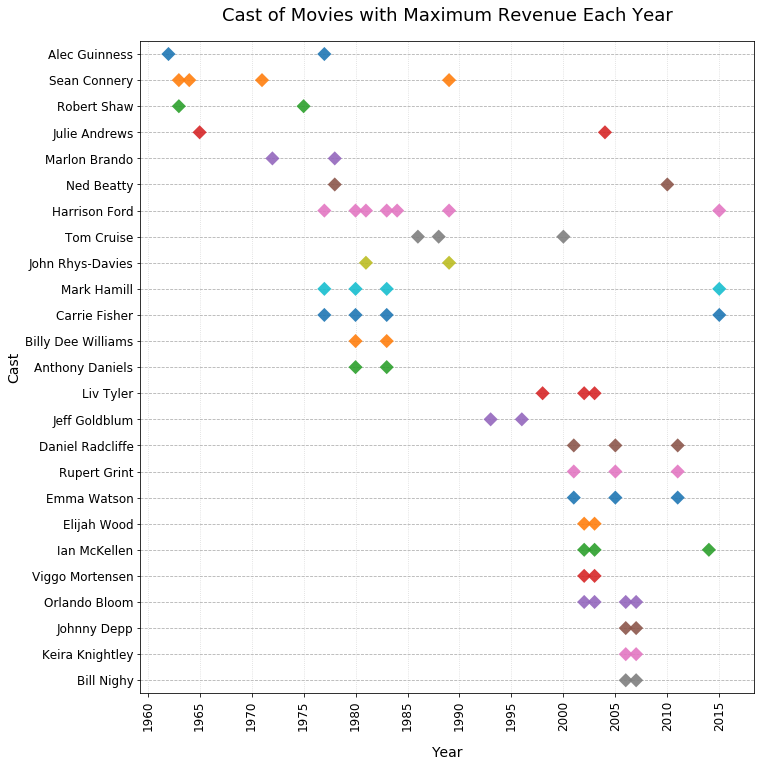

In [38]:
# Create categorical plot (stripplot) to view patterns in genres data


# Create x axis values list from 1960 to 1965 by fives
#x_year_val = ((nonunique_cast_df['Title']) + ' ' + ' ' + nonunique_cast_df['Year'].map(str))
#x_year_val = x_year_val.drop_duplicates()
x_year_val = (range(1960,2016,5))

fig, ax = plt.subplots(figsize=(11,12))

sns.stripplot(
    x="Year", y="cast", jitter=False, data=nonunique_cast_df,
    size=10, marker="D", edgecolor="black", alpha=0.9,
    palette=sns.color_palette('tab10', n_colors=17)
)

# format plot

plt.xticks(x_year_val, size=12, rotation=90, ha='center')
plt.yticks(size=12)
plt.title("Cast of Movies with Maximum Revenue Each Year",size=18, pad=20)
plt.ylabel("Cast", size=14)
plt.xlabel("Year", size=14, labelpad=15)
plt.grid(axis='x', which='major', alpha=0.5, ls=':')
plt.grid(axis='y', which='major', ls='--')

### Observations of the Cast of the Movies with Max Revenue Values per Year Figure:
> Reducing the categories to those reappearing actors does help improve the figures read ability. There are now 25 actor categories. Looking at the cast, I notice that there are patterns such as the same actors appearing at the same time such as Harrison Ford, Mark Hamill and Carrie Fisher. This is due to the actors being in movie series, The Star Wars Series in this case. 
>
> Other noted Series that show up are The James Bond Series with Sean Connery, The Lord of the Rings between 2000 and 2005 and The Harry Potter Series between 2001 and 2011. Harrison Ford was in 7 top revenue movies. Four of which are the Star Wars Series and three are the Indiana Jones Series. This is interesting and would need more data and research to determine if he does influence the revenue of movies. This brings up the question of if the high revenue is due to the quality of the series, of the actors or possibily both. In Sean Connery's data, three movies are from the James Bond Series and one from The Indiana Jones Series.
>
> Robert Shaw has also show up for one James Bond Series movie and later shows up for Jaws. The actor with unique, non-series, movies is Tom Cruise. He shows up 3 times for the movies Top Gun, Rain Man and Mission: Impossible II. He also might be a likely case to show that actors influence the revenue of movies. Again, more data and research would be required to determine if there is a connection.
>

<a id='conclusions'></a>
## Conclusions

>   The purpose of this project was to look at the TMDb dataset and use it to try to find possible trend in the movies with to adjusted revenue each year. The independent variables in the project were revenue, genre and cast. The dependent variables were year and adjusted revenue. The three questions that were answered in the project were:
>
>1.	What are the top movies each year based on their 2010 adjusted revenue generated?
>2.	What are the genres of the top movies each year based on 2010 adjusted revenue generated?
>3.	Who are the actors in the top movies each year based on the 2010 adjusted revenue generated?
>
> There were possible trends in the genre and cast data. To possibly answer those questions more data collection and research would be needed. It should be noted that all observations and statements are about possible trend and do not imply correlation or causality. 
>

### References:
<br>

https://www.kaggle.com/tmdb/tmdb-movie-metadata

https://www.themoviedb.org/?language=en-US

https://www.imdb.com/

https://www.the-numbers.com/

https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

https://medium.com/bigdatarepublic/advanced-pandas-optimize-speed-and-memory-a654b53be6c2

https://developers.themoviedb.org/3/getting-started/popularity

https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p

https://stackoverflow.com/questions/11036989/replace-all-0-values-to-na

https://stackoverflow.com/questions/48591594/jupyter-how-to-plot-2-dfs-next-to-each-other

https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows

https://stackoverflow.com/questions/45286696/how-to-display-dataframe-next-to-plot-in-jupyter-notebook/45287049

https://kiwidamien.github.io/stylish-pandas.html

https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html

https://stackoverflow.com/questions/36271413/pandas-merge-nearly-duplicate-rows-based-on-column-value

https://stackoverflow.com/questions/51666374/how-to-remove-strings-present-in-a-list-from-a-column-in-pandas

<br>